# Exceltabelle DSC-Messungen
> Nach Konsultation mit Herrn Kurzweg wurde wirklich Relevante Spalten (Feature und Zielwerte festgelegt)
#### Input / Feature:
- dHm_J/g
- Tm_C

#### Outputs / Zielwerte:
- Matrix
-  Polymer (bei aktueller Datenlage nicht möglich, da alle Polyethylen)
- Masse Polymer (Daten fehlen)
- Alterung (Daten fehlen)


In [34]:
import pandas as pd
import re

In [36]:
import matplotlib.pyplot as plt
import numpy as np

## I) Einlesen der Daten und Eingrezung auf die relevanten Spalten

In [2]:
file_path = "original_data/Einwaagen DSC-Messungen.xlsx"

In [3]:
df = pd.read_excel(file_path, skiprows=1)
df.head(8)

,Nummer,Datum der DSCMessung _Probe,Untersuchung,Probenhalter,m Tara,m Proben,dHm,Ø;sigma,Tm,dHc,Ø;sigma.1,Tc,w ( dHm),w (dHc),Anreicherungsrate,Unnamed: 15,Unnamed: 16,Bemerkungen,Unnamed: 18,Unnamed: 19
0,L001,26-06-2020_Mod.S+PE_1_25 ppm,10K/Min hkh -50 bis 300°C,Lucas Proben_A1,51.93,8.34,5.675,NaN,130.7,-6.276,NaN,118.8,NaN,NaN,0.000025,NaN,NaN,"graues pulver, leichter glanz an einigen parti...",NaN,NaN
1,L002,NaN,NaN,Lucas Proben_A2,51.91,8.49,4.522,5.093667,130.8,-5.199,-5.781667,118.8,0.031002,0.032070,1240.089268,1282.819318,NaN,"Geräte: Netzsch DSC214 Polyma, Mettler Dualran...",NaN,NaN
2,L003,NaN,NaN,Lucas Proben_A3,51.57,7.86,5.084,0.576561,130.7,-5.87,0.543907,118.9,0.596265,0.553109,NaN,NaN,NaN,PE-GUR Standard für Hm 90-150 =Q9 /Hc 125-60°C=S9,NaN,NaN
3,L004,26-06-2020_Mod.S+PE_1_50 ppm,NaN,Lucas Proben_A4,51.54,8.59,4.175,NaN,130.3,-5.263,NaN,119.0,NaN,NaN,0.00005,NaN,NaN,NaN,NaN,NaN
4,L005,NaN,NaN,Lucas Proben_A5,51.32,8.39,5.796,5.085667,130.5,-6.464,-5.874000,119.0,0.030954,0.032583,619.070805,651.652984,165.9,NaN,-181.8,NaN
5,L006,NaN,NaN,Lucas Proben_A6,51.76,9.57,5.286,0.828861,130.5,-5.895,0.600775,119.0,0.857187,0.610940,NaN,NaN,164.1,NaN,-180.2,NaN
6,L007,26-06-2020_Mod.S+PE_1_80 ppm,NaN,Lucas Proben_A7,51.64,7.68,16.3,NaN,130.7,-17.77,NaN,118.9,NaN,NaN,0.00008,NaN,164.4,164.3,-180.5,-180.280000
7,L008,NaN,NaN,Lucas Proben_A8,51.22,7.35,19.49,18.333333,131.2,-21.26,-20.093333,118.6,0.111584,0.111456,1394.806249,1393.203165,163.5,0.966954,-179.2,0.983362


In [4]:
# Trim
df.columns = df.columns.str.replace(' ', '', regex=True)
df.columns

Index(['Nummer', 'DatumderDSCMessung_Probe', 'Untersuchung', 'Probenhalter',
       'mTara', 'mProben', 'dHm', 'Ø;sigma', 'Tm', 'dHc', 'Ø;sigma.1', 'Tc',
       'w(dHm)', 'w(dHc)', 'Anreicherungsrate', 'Unnamed:15', 'Unnamed:16',
       'Bemerkungen', 'Unnamed:18', 'Unnamed:19'],
      dtype='object')

### 1) Passenden Benennung der Spaltennamen 

In [5]:
df.rename(columns={'DatumderDSCMessung_Probe': 'Probenbezeichnung'}, inplace=True)
df.rename(columns={'mProben': 'mProben_mg'}, inplace=True)
df.rename(columns={'dHm': 'dHm_J/g'}, inplace=True)
df.rename(columns={'Tm': 'Tm_C'}, inplace=True)
for col in df.columns:
    print(col)

Nummer
Probenbezeichnung
Untersuchung
Probenhalter
mTara
mProben_mg
dHm_J/g
Ø;sigma
Tm_C
dHc
Ø;sigma.1
Tc
w(dHm)
w(dHc)
Anreicherungsrate
Unnamed:15
Unnamed:16
Bemerkungen
Unnamed:18
Unnamed:19


### 2) Eingrenzung

In [6]:
df_dsc = df[['Nummer', 'Probenbezeichnung','mProben_mg', 'dHm_J/g', 'Tm_C']]
df_dsc

,Nummer,Probenbezeichnung,mProben_mg,dHm_J/g,Tm_C
0,L001,26-06-2020_Mod.S+PE_1_25 ppm,8.34,5.675,130.7
1,L002,NaN,8.49,4.522,130.8
2,L003,NaN,7.86,5.084,130.7
3,L004,26-06-2020_Mod.S+PE_1_50 ppm,8.59,4.175,130.3
4,L005,NaN,8.39,5.796,130.5
...,...,...,...,...,...
382,L383,NaN,12.22,NaN,NaN
383,L384,NaN,9.42,NaN,NaN
384,L385,PF Sand-PE-80ppm-3,12.61,NaN,NaN
385,L386,NaN,10.90,NaN,NaN


### 3) Extraktion von Daten aus der Probebezeichnung

In [7]:
# Werte ergänzen
df_dsc.loc[:, 'Probenbezeichnung'] = df_dsc['Probenbezeichnung'].ffill()
df_dsc

,Nummer,Probenbezeichnung,mProben_mg,dHm_J/g,Tm_C
0,L001,26-06-2020_Mod.S+PE_1_25 ppm,8.34,5.675,130.7
1,L002,26-06-2020_Mod.S+PE_1_25 ppm,8.49,4.522,130.8
2,L003,26-06-2020_Mod.S+PE_1_25 ppm,7.86,5.084,130.7
3,L004,26-06-2020_Mod.S+PE_1_50 ppm,8.59,4.175,130.3
4,L005,26-06-2020_Mod.S+PE_1_50 ppm,8.39,5.796,130.5
...,...,...,...,...,...
382,L383,PF Sand-PE-80ppm-2,12.22,NaN,NaN
383,L384,PF Sand-PE-80ppm-2,9.42,NaN,NaN
384,L385,PF Sand-PE-80ppm-3,12.61,NaN,NaN
385,L386,PF Sand-PE-80ppm-3,10.90,NaN,NaN


#### b) Entfernen von Datumswerten

In [8]:
# Funktion, um das Datum am Anfang zu entfernen
def remove_date(proben):
    if isinstance(proben, str):  # Überprüfen, ob der Wert eine Zeichenkette ist
        return re.sub(r'^\d{2}-\d{2}-\d{4}_?', '', proben)
    return proben  # Falls es kein String ist (z.B. NaN), den Wert unverändert zurückgeben

# Anwenden der Funktion auf die Spalte "Probenbezeichnung"
df_dsc.loc[:, 'Probenbezeichnung'] = df_dsc['Probenbezeichnung'].apply(remove_date)
df_dsc

,Nummer,Probenbezeichnung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S+PE_1_25 ppm,8.34,5.675,130.7
1,L002,Mod.S+PE_1_25 ppm,8.49,4.522,130.8
2,L003,Mod.S+PE_1_25 ppm,7.86,5.084,130.7
3,L004,Mod.S+PE_1_50 ppm,8.59,4.175,130.3
4,L005,Mod.S+PE_1_50 ppm,8.39,5.796,130.5
...,...,...,...,...,...
382,L383,PF Sand-PE-80ppm-2,12.22,NaN,NaN
383,L384,PF Sand-PE-80ppm-2,9.42,NaN,NaN
384,L385,PF Sand-PE-80ppm-3,12.61,NaN,NaN
385,L386,PF Sand-PE-80ppm-3,10.90,NaN,NaN


#### c) Struktur vereinheitlichen

In [9]:
# Schritt 1: Ersetzen aller "+" durch "-" in der Spalte "Probenbezeichnung" mit .loc
df_dsc.loc[:, 'Probenbezeichnung'] = df_dsc['Probenbezeichnung'].str.replace('+', '-', regex=False)

# Schritt 2: Entfernen von Leerzeichen direkt vor "ppm" in der Spalte "Probenbezeichnung" mit .loc
df_dsc.loc[:, 'Probenbezeichnung'] = df_dsc['Probenbezeichnung'].str.replace(r'\s+ppm', 'ppm', regex=True)
df_dsc

,Nummer,Probenbezeichnung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,8.39,5.796,130.5
...,...,...,...,...,...
382,L383,PF Sand-PE-80ppm-2,12.22,NaN,NaN
383,L384,PF Sand-PE-80ppm-2,9.42,NaN,NaN
384,L385,PF Sand-PE-80ppm-3,12.61,NaN,NaN
385,L386,PF Sand-PE-80ppm-3,10.90,NaN,NaN


#### d) neue Spalte "Matrix" (aus Probebezeichnung extrahieren)

In [10]:
# Funktion zur Extraktion und Zuordnung der Matrix basierend auf regulärem Ausdruck
def extract_matrix(proben):
    # Regulärer Ausdruck für verschiedene Matrix-Bezeichnungen, unabhängig von Groß-/Kleinschreibung und optionalem Punkt
    if re.search(r'mod\.?s', proben, re.IGNORECASE):
        return 'Modellsand'
    elif re.search(r'\bsand\b', proben, re.IGNORECASE):
        return 'Sand'
    elif re.search(r'\belbe\b', proben, re.IGNORECASE):
        return 'Sediment Elbe'
    elif re.search(r'weis', proben, re.IGNORECASE):
        return 'Sediment Weißeritz'
    return None


# Anwenden der Funktion auf die Spalte "Probenbezeichnung"
df_dsc = df_dsc.copy()
df_dsc.loc[:, 'Matrix'] = df_dsc['Probenbezeichnung'].apply(extract_matrix)
# Ergebnis anzeigen
df_dsc

,Nummer,Probenbezeichnung,mProben_mg,dHm_J/g,Tm_C,Matrix
0,L001,Mod.S-PE_1_25ppm,8.34,5.675,130.7,Modellsand
1,L002,Mod.S-PE_1_25ppm,8.49,4.522,130.8,Modellsand
2,L003,Mod.S-PE_1_25ppm,7.86,5.084,130.7,Modellsand
3,L004,Mod.S-PE_1_50ppm,8.59,4.175,130.3,Modellsand
4,L005,Mod.S-PE_1_50ppm,8.39,5.796,130.5,Modellsand
...,...,...,...,...,...,...
382,L383,PF Sand-PE-80ppm-2,12.22,NaN,NaN,Sand
383,L384,PF Sand-PE-80ppm-2,9.42,NaN,NaN,Sand
384,L385,PF Sand-PE-80ppm-3,12.61,NaN,NaN,Sand
385,L386,PF Sand-PE-80ppm-3,10.90,NaN,NaN,Sand


#### e) neue Spalte "Polymer"

In [11]:
# Funktion zur Extraktion des Polymers
def extract_polymer(proben):
    # Regulärer Ausdruck für Polyethylen (PE)
    if re.search(r'[-_]PE[-_]', proben, re.IGNORECASE):
        return 'Polyethylen'
    
    # Regulärer Ausdruck für Polypropylen (PP), bei Bedarf aktivieren
    # if re.search(r'[-_]?PP[-_]', proben, re.IGNORECASE):
    #     return 'Polypropylen'
    return None

# Anwenden der Funktion auf die Spalte "Probenbezeichnung" und das Ergebnis mit .loc speichern
df_dsc.loc[:, 'Polymer'] = df_dsc['Probenbezeichnung'].apply(extract_polymer)
df_dsc

,Nummer,Probenbezeichnung,mProben_mg,dHm_J/g,Tm_C,Matrix,Polymer
0,L001,Mod.S-PE_1_25ppm,8.34,5.675,130.7,Modellsand,Polyethylen
1,L002,Mod.S-PE_1_25ppm,8.49,4.522,130.8,Modellsand,Polyethylen
2,L003,Mod.S-PE_1_25ppm,7.86,5.084,130.7,Modellsand,Polyethylen
3,L004,Mod.S-PE_1_50ppm,8.59,4.175,130.3,Modellsand,Polyethylen
4,L005,Mod.S-PE_1_50ppm,8.39,5.796,130.5,Modellsand,Polyethylen
...,...,...,...,...,...,...,...
382,L383,PF Sand-PE-80ppm-2,12.22,NaN,NaN,Sand,Polyethylen
383,L384,PF Sand-PE-80ppm-2,9.42,NaN,NaN,Sand,Polyethylen
384,L385,PF Sand-PE-80ppm-3,12.61,NaN,NaN,Sand,Polyethylen
385,L386,PF Sand-PE-80ppm-3,10.90,NaN,NaN,Sand,Polyethylen


#### f) neue Spalte "Konzentration"

In [12]:
# Funktion zur Extraktion der Konzentration
def extract_concentration(proben):
    # Regulärer Ausdruck für eine Zahl gefolgt von "ppm", die durch "-" oder "_" eingeleitet wird
    match = re.search(r'[-_](\d+)ppm', proben, re.IGNORECASE)
    if match:
        return match.group(1)  # Gibt nur die Zahl zurück
    return None

# Anwenden der Funktion auf die Spalte "Probenbezeichnung" und das Ergebnis mit .loc speichern
df_dsc.loc[:, 'Konzentration_ppm'] = df_dsc['Probenbezeichnung'].apply(extract_concentration)
df_dsc

,Nummer,Probenbezeichnung,mProben_mg,dHm_J/g,Tm_C,Matrix,Polymer,Konzentration_ppm
0,L001,Mod.S-PE_1_25ppm,8.34,5.675,130.7,Modellsand,Polyethylen,25
1,L002,Mod.S-PE_1_25ppm,8.49,4.522,130.8,Modellsand,Polyethylen,25
2,L003,Mod.S-PE_1_25ppm,7.86,5.084,130.7,Modellsand,Polyethylen,25
3,L004,Mod.S-PE_1_50ppm,8.59,4.175,130.3,Modellsand,Polyethylen,50
4,L005,Mod.S-PE_1_50ppm,8.39,5.796,130.5,Modellsand,Polyethylen,50
...,...,...,...,...,...,...,...,...
382,L383,PF Sand-PE-80ppm-2,12.22,NaN,NaN,Sand,Polyethylen,80
383,L384,PF Sand-PE-80ppm-2,9.42,NaN,NaN,Sand,Polyethylen,80
384,L385,PF Sand-PE-80ppm-3,12.61,NaN,NaN,Sand,Polyethylen,80
385,L386,PF Sand-PE-80ppm-3,10.90,NaN,NaN,Sand,Polyethylen,80


### 4) Reihenfolgen anpassen

In [13]:
# fehlende Spalten
df_dsc['Masse Polymer'] = None
df_dsc['Alterung'] = None

In [14]:
# Spalten in der gewünschten Reihenfolge anordnen
new_order = ['Nummer', 'Probenbezeichnung', 'Konzentration_ppm', 
             'Matrix', 'Polymer','Masse Polymer', 'Alterung', 'mProben_mg',
             'dHm_J/g', 'Tm_C']

In [15]:
df_dsc = df_dsc[new_order]
df_dsc

,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,None,None,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,None,None,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...
382,L383,PF Sand-PE-80ppm-2,80,Sand,Polyethylen,None,None,12.22,NaN,NaN
383,L384,PF Sand-PE-80ppm-2,80,Sand,Polyethylen,None,None,9.42,NaN,NaN
384,L385,PF Sand-PE-80ppm-3,80,Sand,Polyethylen,None,None,12.61,NaN,NaN
385,L386,PF Sand-PE-80ppm-3,80,Sand,Polyethylen,None,None,10.90,NaN,NaN


### 5) Preparation Cleaning

In [16]:
df_dsc.dtypes

Nummer                object
Probenbezeichnung     object
Konzentration_ppm     object
Matrix                object
Polymer               object
Masse Polymer         object
Alterung              object
mProben_mg           float64
dHm_J/g               object
Tm_C                 float64
dtype: object

#### dHm in J/g

In [17]:
print(df_dsc['dHm_J/g'].apply(type).value_counts())

# Zählen der verschiedenen Datentypen sowie NaN-Werte
print("\ngenaue Unterscheidung (explizit NaN-Werte):")
print(df_dsc['dHm_J/g'].apply(lambda x: type(x) if not pd.isna(x) else '<NaN (float)>').value_counts())


dHm_J/g
<class 'float'>    359
<class 'str'>       21
<class 'int'>        7
Name: count, dtype: int64

genaue Unterscheidung (explizit NaN-Werte):
dHm_J/g
<class 'float'>    338
<class 'str'>       21
<NaN (float)>       21
<class 'int'>        7
Name: count, dtype: int64


In [18]:
# Löschen der Zeilen, in denen der Wert in der Spalte "dHm_J/g" ein String oder NaN ist
df_dsc = df_dsc[~df_dsc['dHm_J/g'].apply(lambda x: isinstance(x, str) or pd.isna(x))]
df_dsc

,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,None,None,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,None,None,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...
370,L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,None,None,1.05,147.8,130.5
371,L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,None,None,1.09,150.6,130.5
372,L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,None,None,1.00,144.9,130.6
373,L374,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,None,None,1.04,133.7,131.2


In [19]:
# Umwandlung nur von int-Werten in float
df_dsc.loc[:, 'dHm_J/g'] = df_dsc['dHm_J/g'].apply(lambda x: float(x) if isinstance(x, int) else x)
df_dsc['dHm_J/g'].dtype

dtype('O')

In [20]:
# Versuche, die Spalte 'dHm_J/g' in float zu konvertieren
df_dsc.loc[:, 'dHm_J/g'] = pd.to_numeric(df_dsc['dHm_J/g'], errors='coerce')
print(df_dsc['dHm_J/g'].apply(lambda x: type(x) if not pd.isna(x) else '<NaN (float)>').value_counts())

dHm_J/g
<class 'float'>    345
Name: count, dtype: int64


#### Tm in Grad Celsius

In [21]:
df_dsc['Tm_C'].apply(lambda x: type(x) if not pd.isna(x) else '<NaN (float)>').value_counts()

Tm_C
<class 'float'>    335
<NaN (float)>       10
Name: count, dtype: int64

In [22]:
df_dsc = df_dsc.loc[~df_dsc['Tm_C'].isna()]
df_dsc

,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,None,None,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,None,None,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...
370,L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,None,None,1.05,147.8,130.5
371,L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,None,None,1.09,150.6,130.5
372,L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,None,None,1.00,144.9,130.6
373,L374,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,None,None,1.04,133.7,131.2


#### Entfernen weiterer NaN Werte

In [23]:
df_dsc.isna().sum()

Nummer                 0
Probenbezeichnung      0
Konzentration_ppm     61
Matrix                38
Polymer               53
Masse Polymer        335
Alterung             335
mProben_mg             0
dHm_J/g                0
Tm_C                   0
dtype: int64

In [24]:
df_dsc = df_dsc.loc[~df_dsc['Matrix'].isna()]
df_dsc = df_dsc.loc[~df_dsc['Konzentration_ppm'].isna()]
df_dsc = df_dsc.loc[~df_dsc['Polymer'].isna()]
df_dsc

,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,None,None,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,None,None,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,None,None,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...
370,L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,None,None,1.05,147.8,130.5
371,L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,None,None,1.09,150.6,130.5
372,L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,None,None,1.00,144.9,130.6
373,L374,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,None,None,1.04,133.7,131.2


In [25]:
df_dsc.isna().sum()

Nummer                 0
Probenbezeichnung      0
Konzentration_ppm      0
Matrix                 0
Polymer                0
Masse Polymer        274
Alterung             274
mProben_mg             0
dHm_J/g                0
Tm_C                   0
dtype: int64

In [26]:
df_dsc.dtypes

Nummer                object
Probenbezeichnung     object
Konzentration_ppm     object
Matrix                object
Polymer               object
Masse Polymer         object
Alterung              object
mProben_mg           float64
dHm_J/g               object
Tm_C                 float64
dtype: object

### 6) Export

In [27]:
df_dsc.to_csv("data/010_dsc.csv", index=False)
df_dsc.to_excel("data/Excel/010_dsc.xlsx", index=False)

## II) Analyse (Boxplots)

In [28]:
df_dsc = pd.read_csv("data/010_dsc.csv")
df_dsc

,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...
269,L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.05,147.800,130.5
270,L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.09,150.600,130.5
271,L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.00,144.900,130.6
272,L374,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.04,133.700,131.2


In [29]:
df_dsc.dtypes

Nummer                object
Probenbezeichnung     object
Konzentration_ppm      int64
Matrix                object
Polymer               object
Masse Polymer        float64
Alterung             float64
mProben_mg           float64
dHm_J/g              float64
Tm_C                 float64
dtype: object

In [32]:
def create_boxplot(df, column, title, ylabel):
    # Alle Inf-Werte im DataFrame zu NaN umwandeln, um sicherzustellen, dass es keine 'inf' gibt
    df[column] = df[column].replace([np.inf, -np.inf], np.nan)

    # Figur erstellen
    plt.figure(figsize=(6, 6))

    # Einfachen Boxplot erstellen (ohne Füllung)
    plt.boxplot(df[column].dropna(), vert=True, patch_artist=False, 
                boxprops=dict(color='darkblue'),  # Keine Füllfarbe
                medianprops=dict(color='darkgreen', linewidth=1.5))

    # Minimal zufällige Streuung (Jitter) der Punkte entlang der x-Achse
    jitter = np.random.normal(0, 0.05, size=len(df[column]))  # Minimaler Jitter
    plt.plot(np.ones(len(df[column])) + jitter, df[column], 'o', color="orange", alpha=0.4, markersize=2)

    # Achsen und Titel hinzufügen
    plt.title(title)
    plt.ylabel(ylabel)
    
    # X-Achse beschriften mit dem Namen der Spalte
    plt.xticks([1], [column])  # Der Wert "1" bezieht sich auf den Boxplot, der an der x-Achse positioniert wird
    
    # Gitterlinien für die y-Achse hinzufügen
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

    # Diagramm anzeigen
    plt.show()

In [40]:
# Berechnung der Quantile und Ausreißer etc. für eine Spalte 
def calculate_quantiles_and_outliers(df, column):
    # Berechne die Quantile (25%, 50%, 75%)
    quantiles = df[column].quantile([0.25, 0.5, 0.75])
    
    # Berechnung des Interquartilen Bereichs (IQR)
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75]
    IQR = Q3 - Q1
    
    # Identifiziere Ausreißer basierend auf dem IQR
    lower_bound = Q1 - 1.5 * IQR  # Untere Grenze für Ausreißer
    upper_bound = Q3 + 1.5 * IQR  # Obere Grenze für Ausreißer
    
    # Filtere die Ausreißer
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, IQR, lower_bound, upper_bound, quantiles

### 1) Analyse der (möglichen) Output/Ziel-Werte

#### a) Matrix

In [30]:
df_dsc["Matrix"].value_counts()

Matrix
Modellsand            91
Sediment Weißeritz    63
Sediment Elbe         63
Sand                  57
Name: count, dtype: int64

#### b) Konzentration

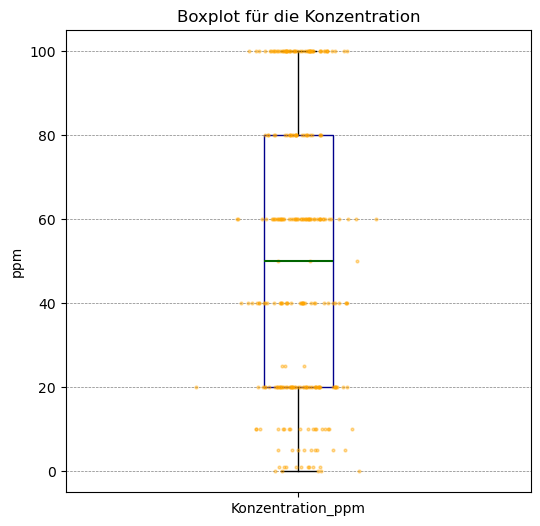

In [37]:
create_boxplot(df_dsc, "Konzentration_ppm", "Boxplot für die Konzentration", "ppm")

### 2) Analyse der Input-Werte / Feature

#### a) dHm_J/g

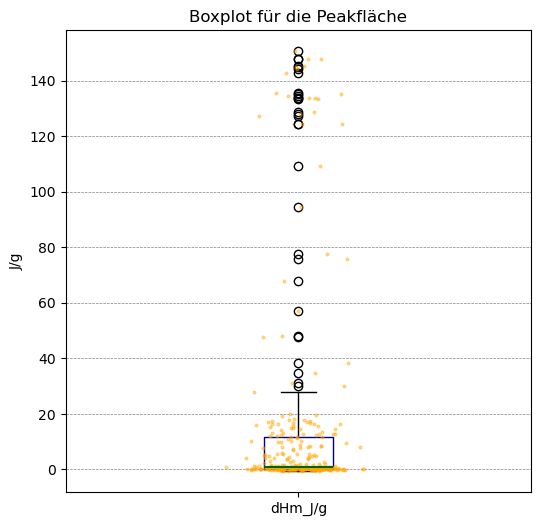

In [38]:
create_boxplot(df_dsc, "dHm_J/g", "Boxplot für die Peakfläche", "J/g")

#### b) Tm_C 

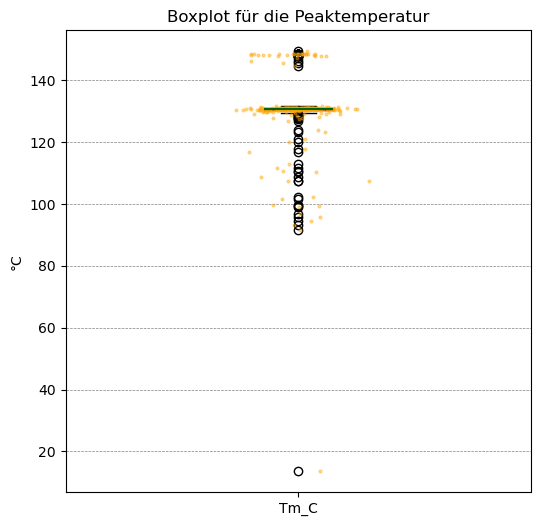

In [39]:
create_boxplot(df_dsc, "Tm_C", "Boxplot für die Peaktemperatur", "°C")

In [44]:
# Beispielaufruf der Funktion für die Spalte 'Tm_C'
outliers, IQR, lower_bound, upper_bound, quantiles = calculate_quantiles_and_outliers(df_dsc, 'Tm_C')
print(f"Quantile:\n{quantiles}")
print(f"\nInterquartilsabstand IQR = {round(IQR, 4)}\n")
print(f"Lower Bound = {lower_bound}")
print(f"Upper Bound = {round(upper_bound, 4)}")

Quantile:
0.25    130.4
0.50    130.7
0.75    131.0
Name: Tm_C, dtype: float64

Interquartilsabstand IQR = 0.6

Lower Bound = 129.5
Upper Bound = 131.9


In [42]:
print("Ausreißer:")
outliers

Ausreißer:


,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
44,L047,ModS-PE-40ppm-3,40,Modellsand,Polyethylen,NaN,NaN,8.69,11.02000,13.6
82,L121,ZF Sand-PE-0ppm-1,0,Sand,Polyethylen,NaN,NaN,10.49,-0.41910,112.9
83,L122,ZF Sand-PE-0ppm-1,0,Sand,Polyethylen,NaN,NaN,9.32,-0.57530,116.8
84,L123,ZF Sand-PE-0ppm-1,0,Sand,Polyethylen,NaN,NaN,10.27,-0.45560,108.7
121,L166,ZF Weis-PE-100ppm-1,100,Sediment Weißeritz,Polyethylen,NaN,NaN,13.64,0.26700,127.5
...,...,...,...,...,...,...,...,...,...,...
217,L295,ZF Elbe-PE-20ppm-3,20,Sediment Elbe,Polyethylen,NaN,NaN,21.85,0.33790,148.3
218,L296,ZF Elbe-PE-20ppm-3,20,Sediment Elbe,Polyethylen,NaN,NaN,20.10,0.11190,148.0
219,L297,ZF Elbe-PE-20ppm-3,20,Sediment Elbe,Polyethylen,NaN,NaN,19.13,-0.05172,123.4
232,L334,DS Elbe-PE-20ppm-1,20,Sediment Elbe,Polyethylen,NaN,NaN,1.19,16.36000,129.2
